In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics

In [55]:
fileName = "./scripts/sssp_trails_1_results.csv"
new_data = pd.read_csv(fileName)
new_data
CNT_POW = 0.95

In [56]:
fileN = "./RunTimePerf/SSSP"

In [57]:
new_data = pd.read_csv(fileN)
new_data

,Unnamed: 0,BenchmarkName,IterationID,Loop Count,Real Time,System Time,User Time
0,0,SSSP,D0,20,55081.0,29384.0,7212.0
1,0,SSSP,D1,10,26543.0,14580.0,3420.0
2,0,SSSP,D2,5,13868.0,7612.0,1824.0
3,0,SSSP,D3,5,13495.0,7372.0,1716.0
4,0,SSSP,C0,20,53445.0,28156.0,7124.0
5,0,SSSP,C1,10,26872.0,13880.0,3720.0
6,0,SSSP,C2,5,13378.0,6984.0,1864.0
7,0,SSSP,C3,5,13285.0,6752.0,1900.0


In [58]:
for index,row in new_data.iterrows():
    print(row["BenchmarkName"],row["IterationID"],row["Loop Count"], row["Real Time"])

SSSP D0 20 55081.0
SSSP D1 10 26543.0
SSSP D2 5 13868.0
SSSP D3 5 13495.0
SSSP C0 20 53445.0
SSSP C1 10 26872.0
SSSP C2 5 13378.0
SSSP C3 5 13285.0


In [59]:
def getPerformance(fileName):
    new_data = pd.read_csv(fileName)
    base_perf = max(new_data["Real Time"])
    perf_data = {}
    for index,row in new_data.iterrows():
        if row["BenchmarkName"] not in perf_data:
            perf_data[row["BenchmarkName"]] = {}
        perf_data[row["BenchmarkName"]][(row["IterationID"],row["Loop Count"])] = row["Real Time"]

    return perf_data
    

getPerformance("./RunTimePerf/SSSP")

{'SSSP': {('D0', 20): 55081.0,
  ('D1', 10): 26543.0,
  ('D2', 5): 13868.0,
  ('D3', 5): 13495.0,
  ('C0', 20): 53445.0,
  ('C1', 10): 26872.0,
  ('C2', 5): 13378.0,
  ('C3', 5): 13285.0}}

In [60]:
def getPerformanceF(folderName):
    dirpath = os.path.join(os.getcwd() + "/"+folderName)
    perf_data = {}
    for filename in os.listdir(dirpath):
        f = os.path.join(dirpath, filename)
        new_data = pd.read_csv(f)
        for index,row in new_data.iterrows():
            if row["BenchmarkName"] not in perf_data:
                perf_data[row["BenchmarkName"]] = {}
            perf_data[row["BenchmarkName"]][(row["IterationID"],row["Loop Count"])] = row["Real Time"]/1000.0

    return perf_data

In [61]:
getPerformanceF("RunTimePerf")

{'SC': {('D0', 20): 197.644,
  ('D1', 10): 97.784,
  ('D2', 5): 45.852,
  ('D3', 5): 48.61,
  ('C0', 20): 202.196,
  ('C1', 10): 101.401,
  ('C2', 5): 50.12,
  ('C3', 5): 50.021},
 'HSTI': {('D0', 100): 100.547,
  ('D1', 50): 50.418,
  ('D2', 20): 21.637,
  ('D3', 10): 9.846,
  ('C0', 100): 87.996,
  ('C1', 50): 44.106,
  ('C2', 20): 17.605,
  ('C3', 10): 8.848},
 'TRNS': {('D0', 20): 107.404,
  ('D1', 10): 53.529,
  ('D2', 5): 26.679,
  ('D3', 5): 26.561,
  ('C0', 20): 124.643,
  ('C1', 10): 62.193,
  ('C2', 5): 31.059,
  ('C3', 5): 30.97},
 'HSTO': {('D0', 20): 130.591,
  ('D1', 10): 66.035,
  ('D2', 5): 32.917,
  ('D3', 5): 33.086,
  ('C0', 20): 127.619,
  ('C1', 10): 63.704,
  ('C2', 5): 31.899,
  ('C3', 5): 31.929},
 'CEDD': {('D0', 10): 206.024,
  ('D1', 5): 103.676,
  ('D2', 2): 41.941,
  ('D3', 2): 41.864,
  ('C0', 10): 204.135,
  ('C1', 5): 104.56,
  ('C2', 2): 40.645,
  ('C3', 2): 41.207},
 'TQ': {('D0', 100): 56.029,
  ('D1', 50): 27.825,
  ('D2', 20): 11.0,
  ('D3', 20): 11

In [62]:
def getPowerF(foldername):
    dirpath = os.path.join(os.getcwd() + "/"+foldername)
    powData = {}
    for fname in os.listdir(dirpath):
        ft = fname.split("_")
#         print(ft[1],ft[3],ft[5])
        if ft[1] not in powData:
            powData[ft[1]] = {}

        f = os.path.join(dirpath, fname)
        file = open(f, 'r')
        lines = file.readlines()
        mydata = []
        for line in lines:
            line = line.replace(" ",",")
            line = line.split(",")
            value = int(line[line.index('VDD_IN')+1].split("/")[0])
            mydata.append(value)

        powData[ft[1]][(ft[3],int(ft[5]))] = sum(mydata)/10000.0
    return powData
    

In [63]:
getPowerF("TegraChai")

{'CEDD': {('D2', 2): 78.8149,
  ('D3', 2): 78.9247,
  ('D1', 5): 195.3492,
  ('C3', 2): 88.0008,
  ('C2', 2): 86.8125,
  ('C1', 5): 225.1509,
  ('D0', 10): 394.633,
  ('C0', 10): 438.4012},
 'SSSP': {('C0', 20): 177.1832,
  ('C1', 10): 87.9575,
  ('D1', 10): 108.273,
  ('D0', 20): 230.467,
  ('D3', 5): 54.0077,
  ('D2', 5): 55.8339,
  ('C2', 5): 43.8713,
  ('C3', 5): 43.6398},
 'TRNS': {('D0', 20): 432.2053,
  ('D1', 10): 216.3741,
  ('C1', 10): 208.3334,
  ('C0', 20): 419.8664,
  ('D3', 5): 108.6183,
  ('D2', 5): 108.4514,
  ('C2', 5): 103.9439,
  ('C3', 5): 104.3266},
 'SC': {('D1', 10): 185.622,
  ('D0', 20): 380.5435,
  ('D3', 5): 91.9615,
  ('D2', 5): 86.6088,
  ('C2', 5): 105.3972,
  ('C0', 20): 428.4762,
  ('C3', 5): 105.7863,
  ('C1', 10): 213.5328},
 'TQ': {('C2', 20): 17.4946,
  ('D0', 100): 118.2098,
  ('C3', 20): 16.6205,
  ('D3', 20): 23.5694,
  ('D2', 20): 23.1951,
  ('C1', 50): 41.7221,
  ('C0', 100): 84.3023,
  ('D1', 50): 58.6665},
 'HSTI': {('D2', 20): 50.7582,
  ('D3

In [68]:
#Get PPE

# We will get the D as 1 and the assign the others
pow_dict = getPowerF("TegraChai")
perf_dict = getPerformanceF("RunTimePerf")
PPE_dict = {}
for key in pow_dict:
    PPE_dict[key] = {}
    print(key)
    for dkey in pow_dict[key]:
        if dkey[0][0]=='D':
#             print(dkey)
            fkey = 'C'+dkey[0][1]
            skey = dkey[1]
            nk = (fkey,skey)
            perfD = perf_dict[key][dkey]
            perfC = perf_dict[key][nk]
            powrD = pow_dict[key][dkey]
            powrC = pow_dict[key][nk]
            
            pp_val = (perfD*powrD)/(perfC*powrC*CNT_POW)
            PPE_dict[key][nk] = pp_val
        else:
            continue


CEDD
SSSP
TRNS
SC
TQ
HSTI
HSTO


In [69]:
PPE_dict

{'CEDD': {('C2', 2): 0.9861298697937237,
  ('C3', 2): 0.9591188761209566,
  ('C1', 5): 0.9055803762426843,
  ('C0', 10): 0.9563093482783449},
 'SSSP': {('C1', 10): 1.2798931190354974,
  ('C0', 20): 1.4110985229955644,
  ('C3', 5): 1.3233071403309442,
  ('C2', 5): 1.3887257770726484},
 'TRNS': {('C0', 20): 0.9337012151731074,
  ('C1', 10): 0.9409583302965976,
  ('C3', 5): 0.939912788181381,
  ('C2', 5): 0.9433972981004846},
 'SC': {('C1', 10): 0.8824026594065246,
  ('C0', 20): 0.9138292904602825,
  ('C3', 5): 0.8892548963224093,
  ('C2', 5): 0.7913280566116891},
 'TQ': {('C0', 100): 2.399384455046822,
  ('C3', 20): 2.429665429598331,
  ('C2', 20): 2.207631720354766,
  ('C1', 50): 2.4056465949122834},
 'HSTI': {('C2', 20): 1.6105300241631144,
  ('C3', 10): 1.383296514797672,
  ('C1', 50): 1.440516331663693,
  ('C0', 100): 1.459348041778281},
 'HSTO': {('C0', 20): 1.094637500575067,
  ('C3', 5): 1.0276515132895392,
  ('C2', 5): 1.0064047839555381,
  ('C1', 10): 1.0308308463874514}}

In [31]:
def powerAnalyze(folder):
    dirpath = os.path.join(os.getcwd() + "/"+folder)
    total_pow = {}
    for filename in os.listdir(dirpath):
        ftemp = filename.split("_")
        cpuF,memF,gpuF = ftemp[ftemp.index('C')+1],ftemp[ftemp.index('M')+1],ftemp[ftemp.index('G')+1]
        f = os.path.join(dirpath, filename)
        file = open(f, 'r')
        lines = file.readlines()
        total_pow[(int(cpuF),int(memF),int(gpuF))] = 0
        mydata = []
        for line in lines:
            line = line.replace(" ",",")
            line = line.split(",")
            value = int(line[line.index('VDD_IN')+1].split("/")[0])
            mydata.append(value)
        
        total_pow[(int(cpuF),int(memF),int(gpuF))] = statistics.mean(mydata)
    return total_pow

# MeanPow = powerAnalyze("TegraData")     
# print("Done")
            
            
        
        
    

In [32]:
#Combined Data
def getCombinedData(perf_file,pow_folder):
#     perf_file = "./scripts/sssp_trails_1_results.csv"
#     pow_folder = "TegraData"
    perf = getPerformance(perf_file)
    powD = powerAnalyze(pow_folder) # In this function we use average power, we should try some other metric, like the roof power
    combinedData = {}
    for key in perf.keys():
        combinedData[key] = (perf[key],powD[key])
    return combinedData

# getCombinedData()
    

In [33]:
data = getCombinedData("./scripts/sssp_trails_1_results.csv","TegraDataSSSP")
PlotData = data
perfD = [data[key][0] for key in data.keys() ]
powD = [data[key][1]/1000.0 for key in data.keys() ]

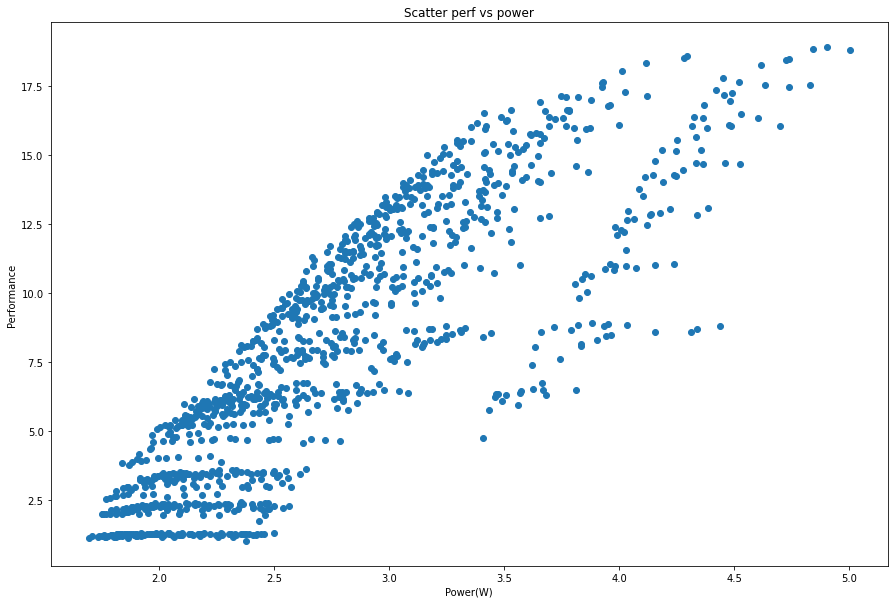

In [34]:
# plt.figure()
plt.subplots(figsize=(15,10))
plt.scatter(powD, perfD)
plt.title("Scatter perf vs power")
plt.xlabel("Power(W)")
plt.ylabel("Performance")
plt.show()

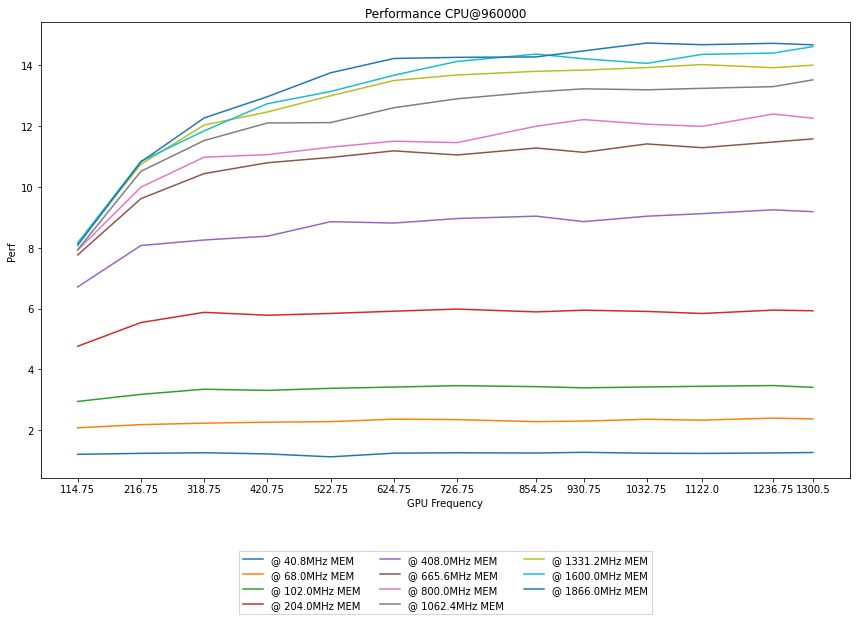

In [35]:
## Plot the impact of Mem, GPU, and CPU

#fixedCPU
cpu_f = cpu_list[4]

xs = gpu_freq_display_list
ys = []
ys_label = []
for j,mem_f in enumerate(mem_list):
    ytemp = []
    for gpu_f in gpu_list:
        ytemp.append(data[(cpu_f,mem_f,gpu_f)][0])
    ys.append(ytemp)
    ys_label.append("@ {}MHz MEM".format(mem_freq_display_list[j]))

    

fig = plt.figure(figsize=(12,8))
# figsize=(1,1)
ax = plt.subplot(111)
for i, y in enumerate(ys):
    ax.plot(xs, y, label=ys_label[i])
plt.xticks(xs, gpu_freq_display_list)
plt.title("Performance CPU@{}".format(cpu_f))
plt.xlabel("GPU Frequency")
plt.ylabel("Perf")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=False, shadow=False, ncol=3)
plt.tight_layout()
plt.show()




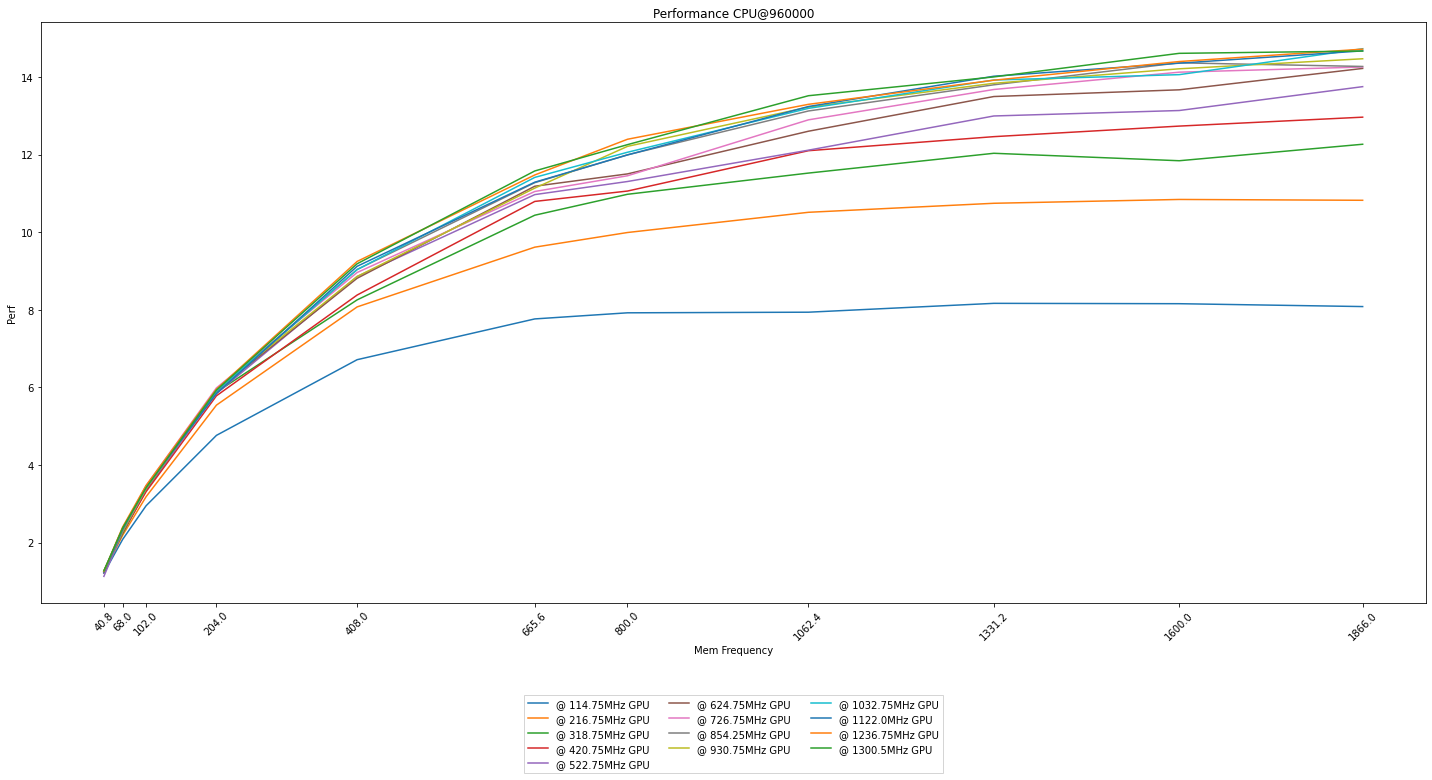

In [36]:
## Plot the impact of Mem, GPU, and CPU

#fixedCPU
cpu_f = cpu_list[4]

xs = mem_freq_display_list
ys = []
ys_label = []
for j,gpu_f in enumerate(gpu_list):
    ytemp = []
    for mem_f in mem_list:
        ytemp.append(data[(cpu_f,mem_f,gpu_f)][0])
    ys.append(ytemp)
    ys_label.append("@ {}MHz GPU".format(gpu_freq_display_list[j]))

    

fig = plt.figure(figsize=(20,10))
# figsize=(1,1)
ax = plt.subplot(111)
for i, y in enumerate(ys):
    ax.plot(xs, y, label=ys_label[i])
plt.xticks(xs, mem_freq_display_list,rotation=45)
plt.title("Performance CPU@{}".format(cpu_f))
plt.xlabel("Mem Frequency")
plt.ylabel("Perf")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                box.width, box.height * 0.9])
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=False, shadow=False, ncol=3)
plt.tight_layout()
plt.show()
